### Задание №1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
from sklearn.model_selection import train_test_split

data = boston.data
feature_names = boston.feature_names
target = boston.target
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

d:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


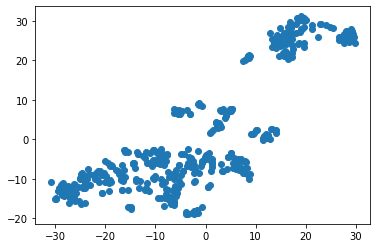

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание №2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

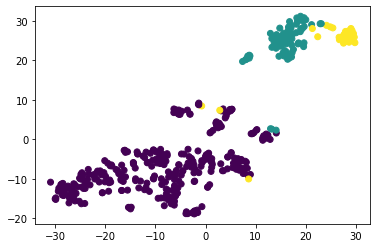

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)
train_labels = model.fit_predict(X_train) #на этой строчке вылетает ошибка если использовать Python v3.8.5
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()


In [16]:
print('Среднее значение "price" в кластере № 1=', y_train[train_labels == 0].mean().values[0], '. Среднее значение "CRIM"=', X_train['CRIM'][train_labels == 0].mean())
print('Среднее значение "price" в кластере № 2=', y_train[train_labels == 1].mean().values[0], '. Среднее значение "CRIM"=', X_train['CRIM'][train_labels == 1].mean())
print('Среднее значение "price" в кластере № 3=', y_train[train_labels == 2].mean().values[0], '. Среднее значение "CRIM"=', X_train['CRIM'][train_labels == 2].mean())

Среднее значение "price" в кластере № 1= 25.168686868686873 . Среднее значение "CRIM"= 0.40486282828282844
Среднее значение "price" в кластере № 2= 17.4421052631579 . Среднее значение "CRIM"= 11.745661842105266
Среднее значение "price" в кластере № 3= 13.196774193548386 . Среднее значение "CRIM"= 14.360380322580648


#### Задание №3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

d:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


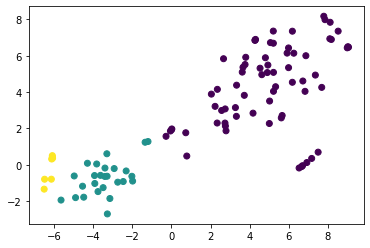

In [18]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
test_labels = model.fit_predict(X_test)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()

In [19]:
print('Среднее значение "price" в кластере № 1=', y_test[test_labels == 0].mean().values[0], '. Среднее значение "CRIM"=', X_test['CRIM'][test_labels == 0].mean())
print('Среднее значение "price" в кластере № 2=', y_test[test_labels == 1].mean().values[0], '. Среднее значение "CRIM"=', X_test['CRIM'][test_labels == 1].mean())
print('Среднее значение "price" в кластере № 3=', y_test[test_labels == 2].mean().values[0], '. Среднее значение "CRIM"=', X_test['CRIM'][test_labels == 2].mean())

Среднее значение "price" в кластере № 1= 23.911594202898552 . Среднее значение "CRIM"= 0.2464211594202899
Среднее значение "price" в кластере № 2= 17.39230769230769 . Среднее значение "CRIM"= 8.469301923076923
Среднее значение "price" в кластере № 3= 12.814285714285713 . Среднее значение "CRIM"= 19.021665714285714
